<a href="https://colab.research.google.com/github/YosefOwenManullang/NLP-Klasifikasi-Genre-Film-dan-Membuat-model-NLP-dengan-Tensorflow/blob/main/NLP(Klasifikasi_Genre_Film)_dan_Membuat_model_NLP_dengan_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP (Klasifikasi Genre Film)

### Required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_movie_train.csv')
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [ ]:
data.drop(columns= 'id', inplace= True)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [ ]:
data.isna().any()

text     False
genre    False
dtype: bool

In [ ]:
data['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

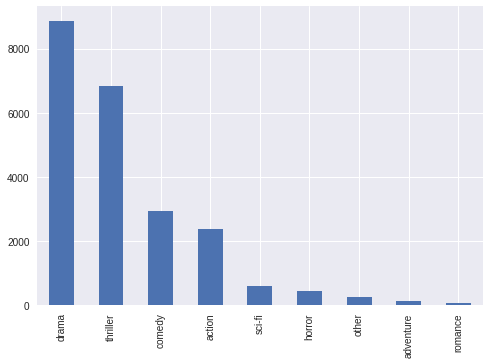

In [ ]:
plt.style.use('seaborn')
data['genre'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
genre_mapping = {'other': 0, 'action': 1, 'romance': 2, 'horror': 3, 'sci-fi': 4, 'comedy': 5,'thriller': 6, 'drama': 7,'adventure': 8}
genre_mapping

{'other': 0,
 'action': 1,
 'romance': 2,
 'horror': 3,
 'sci-fi': 4,
 'comedy': 5,
 'thriller': 6,
 'drama': 7,
 'adventure': 8}

In [ ]:
data['genre'] = data['genre'].map(genre_mapping)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",6
1,"t, summa cum laude and all. And I'm about to l...",5
2,"up Come, I have a surprise.... She takes him ...",7
3,ded by the two detectives. INT. JEFF'S APARTME...,6
4,"nd dismounts, just as the other children reach...",7


In [ ]:
data['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

### Data Cleaning (Pembersihan data)

In [ ]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= data['text'][i])
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [ps.stem(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus[:5]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

### Checking what kind of words in each genre (Memeriksa kata-kata seperti apa di setiap genre)

In [ ]:
genre_mapping

{'other': 0,
 'action': 1,
 'romance': 2,
 'horror': 3,
 'sci-fi': 4,
 'comedy': 5,
 'thriller': 6,
 'drama': 7,
 'adventure': 8}

In [ ]:
scifi_words = []
romance_words = []
thriller_words = []

for i in list(data[data['genre']==4].index):
    scifi_words.append(corpus[i])

for i in list(data[data['genre']==2].index):
    romance_words.append(corpus[i])

for i in list(data[data['genre']==6].index):
    thriller_words.append(corpus[i])

scifi = ''
romance = ''
thriller = ''
for i in range(0, 3):
    scifi += scifi_words[i]
    romance += romance_words[i]
    thriller += thriller_words[i]

### Word Cloud for respective genre (Word Cloud atau metode yang digunakan untuk sortir kata untuk genre masing-masing)

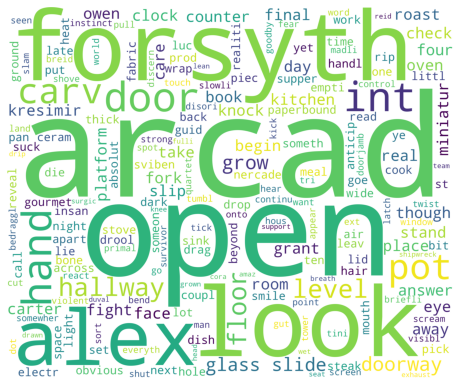

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=3000, height=2500).generate(scifi)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

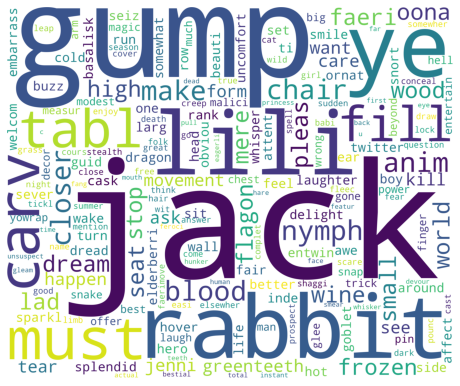

In [ ]:
wc = WordCloud(background_color='white', width=3000, height=2500).generate(romance)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

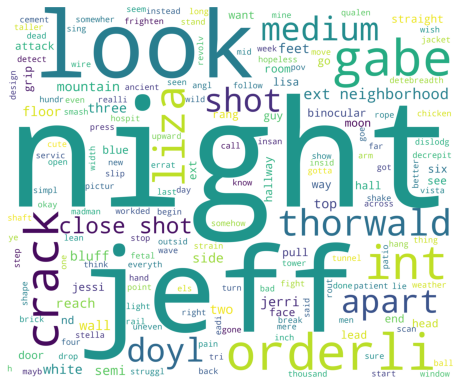

In [ ]:
wc = WordCloud(background_color='white', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Bag of words model

Creating the Bag of Words model (Membuat Model kata bag) 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = data['genre'].values

### Train and Test Split (Latih dan Tes Split)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Model building (Membangun model)

In [ ]:
# Fitting Naive Bayes to the Training set (Menyesuaikan Naive Bayes ke set Pelatihan)
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results (Memprediksi hasil Test set)
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Calculating Accuracy (Menghitung Akurasi)
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Accuracy score is: {}%".format(round(score_*100,2)))

Accuracy score is: 89.57%


In [ ]:
y_test[:5]

array([1, 7, 1, 6, 6])

In [ ]:
y_pred[:5]

array([1, 7, 1, 6, 6])

In [ ]:
# model performance (Kinerja model)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[  62    1    0    2    0    0    0    1    0]
 [   0  450    0    1    0    8   11    6    0]
 [   0    1   10    0    0    0    0    0    0]
 [   0    1    0   73    0    1    3    4    0]
 [   0    2    0    1  112    2    8    7    0]
 [   0    7    0    2    4  517   11   18    0]
 [   0   14    0   11   22   21 1173   77    0]
 [   3   42    1   21   11   38  103 1607    1]
 [   0    2    0    0    0    0    1    1   41]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.87      0.95      0.90       476
           2       0.91      0.91      0.91        11
           3       0.66      0.89      0.76        82
           4       0.75      0.85      0.80       132
           5       0.88      0.92      0.90       559
           6       0.90      0.89      0.89      1318
           7       0.93      0.88      0.91      1827
           8       0.98      0.91      0.94        45

    accuracy             

# Membuat model NLP nya dengan Tensorflow

### Deklarasi fungsi

In [50]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive

### Mengubah dataset menjadi data frame

In [51]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_movie_train.csv")
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


### Menghapus genre yang tidak ingin di test

In [52]:
df = df[~df['genre'].isin(['sci-fi','horror','drama','adventure','action'])]
df['genre'].value_counts()

thriller    6824
comedy      2941
other        270
romance       63
Name: genre, dtype: int64

### Menghapus karakter spesial dan menghapus kolom id fan text

In [53]:
# Menghapus special character di kolom text
df['Text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', x))
# drop kolom id dan text lama
df = df.drop(['id', 'text'], axis=1)
df.head()

,genre,Text
0,thriller,eady dead maybe even wishing he was INT 2ND FL...
1,comedy,t summa cum laude and all And I m about to lau...
3,thriller,ded by the two detectives INT JEFF S APARTMENT...
5,thriller,breadth of the bluff Gabe pulls out his ancien...
6,thriller,uilding A MAN in pajamas runs out into the rai...


### Proses one-hot-encoding.

In [54]:
genre = pd.get_dummies(df.genre)
df_baru = pd.concat([df, genre], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru.head()

,Text,comedy,other,romance,thriller
0,eady dead maybe even wishing he was INT 2ND FL...,0,0,0,1
1,t summa cum laude and all And I m about to lau...,1,0,0,0
3,ded by the two detectives INT JEFF S APARTMENT...,0,0,0,1
5,breadth of the bluff Gabe pulls out his ancien...,0,0,0,1
6,uilding A MAN in pajamas runs out into the rai...,0,0,0,1


### Mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values

In [55]:
text = df_baru['Text'].astype(str)
label = df_baru[['comedy', 'other','romance','thriller']].values

### Split data training dan data testing

In [56]:
genre_train, genre_test, label_train, label_test = train_test_split(text, label, test_size = 0.2)

### Fungsi Tokenizer

In [57]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(genre_train) 
tokenizer.fit_on_texts(genre_test)
 
sekuens_train = tokenizer.texts_to_sequences(genre_train)
sekuens_test = tokenizer.texts_to_sequences(genre_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

### Fungsi compile dan tentukan optimizer serta loss function

In [58]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
Adam(learning_rate=0.00146, name='Adam')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Membuat fungsi callback

In [59]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi dan validasi telah mencapai nilai > 85%!")
      self.model.stop_training = True
callbacks = myCallback()

### Fungsi fit

In [60]:
num_epochs = 50
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=1,
                    callbacks=[callbacks])

Epoch 1/50
253/253 [==============================] - 48s 174ms/step - loss: 0.7995 - accuracy: 0.6716 - val_loss: 0.7805 - val_accuracy: 0.7678
Epoch 2/50
253/253 [==============================] - ETA: 0s - loss: 0.3794 - accuracy: 0.8872
Akurasi dan validasi telah mencapai nilai > 85%!
253/253 [==============================] - 43s 171ms/step - loss: 0.3794 - accuracy: 0.8872 - val_loss: 0.2933 - val_accuracy: 0.9045


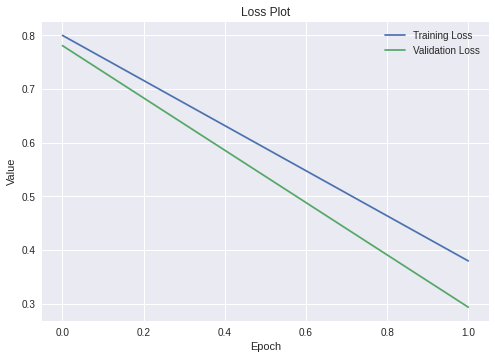

In [61]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

### Accuracy Plot

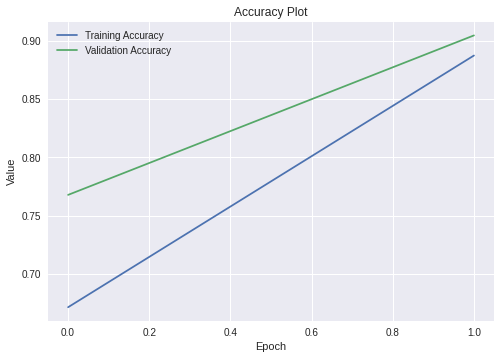

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()